# Project: TMDB movies data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have choosen TMDB movie dataset for this project. This data set contains information about 10,000+ movies collected from The Movie Database. 

Let's check it out by loading the csv file using pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()             # Required for seaborn to take effect
%matplotlib inline

# Load the data
df = pd.read_csv('tmdb-movies.csv')

# Show first 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [2]:
# Show last 5 rows
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


>**We can see that some columns like `budget` and `revenue` have value 0**.

**Let's find out how many rows for the following columns have values 0 or less**

In [3]:
columns_to_check = ['budget', 'revenue', 'budget_adj', 'revenue_adj', 'runtime']
for column in columns_to_check:
    shape = df[df[column] <= 0].shape
    print( f'"{column:11}" has {shape[0]:5} with value zero or less.')

"budget     " has  5696 with value zero or less.
"revenue    " has  6016 with value zero or less.
"budget_adj " has  5696 with value zero or less.
"revenue_adj" has  6016 with value zero or less.
"runtime    " has    31 with value zero or less.


In [4]:
df[df.duplicated() == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [5]:
# Show duplicated rows
df[df.id == 42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Preliminary observations about the dataset
- There are 21 columns and 10866 entries. 
- Many columns like `imdb_id`, `hompage`, `tagline`, `production_companies` have null entries.
- There is `vote_count` and `vote_average column` but no weighted average rating column.
- Few columns like `cast`, `director` and `genere` use '|' as separator to accomdate multiple values.
- `revenue`, `budget`, `revenue_adj`, `budget_adj`, `runtime` have several rows with value 0 or less which does not make sense.
- Rows at index __2089__ and __2090__ are duplicate.

## Brainstorming questions

I am interested in finding answers to the following questions:

- What is the trend in movie rating through the years?
 - Overall distribution of rating 
 - Top 20 highest rated movies of all time
 - Highest rated movie each year
 - Lowest rated movie each year
 - Average rating year on year
- Which properties are associated with movie rating?
 - Does movies rating have correlation with revenue?
 - Does movies rating have correlation with runtime?
 - Does movies rating have correlation with popularity?
 - Does movies rating have correlation with release year?

## Steps required for data cleaning and wrangling

- We can drop columns that are not relevant for this data anaylsis - `imdb_id`, `homepage`, `tagline`, `keywords`, `overview`, `production_companies`
- `budget_adj` and `revenue_adj` columns are `budget` and `revenue` columns repectively adjusted for inflation. So we can drop the latter two.
- We need to be careful about rows with values 0 or less in `budget_adj`, `revenue_adj` and `runtime` columns.
- We need to drop duplicate rows and rows with null entries.
- Finally, in order to avoid bias due to difference in `vote_count`, we will need to calculate weighted average rating using `vote_count` and `vote_average` columns and add it to the dataframe.

<a id='cleaning'></a>
## Data Cleaning

In [7]:
# Drop columns that are irrelevant for this analysis
columns_to_drop = ['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'budget', 'revenue']
df_slim = df.drop(columns=columns_to_drop)
df_slim.head()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


__Now we only have columns that can be relevant for our analysis. We have retained only 13 out of 21 columns.__

In [8]:
df_slim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.1+ MB


**We can see that some rows have null entries for `cast`, `director` and `genre` columns. Let's drop these rows!**

In [9]:
# Drop rows with one or more null entries
df_slim.dropna(inplace=True)
df_slim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 13 columns):
id                10732 non-null int64
popularity        10732 non-null float64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
release_date      10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
budget_adj        10732 non-null float64
revenue_adj       10732 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.1+ MB


In [10]:
# Drop duplicate rows. Dataframe has one duplicate row.
df_slim.drop_duplicates(keep='first', inplace=True)
df_slim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
id                10731 non-null int64
popularity        10731 non-null float64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.1+ MB


>** Now dataframe does not have any null or duplicate entry. However, as mentioned earlier, some of the entries in `budget_adj`, `revenue_adj` and `runtime` are less than or equal to zero which does not seem valid. So we should exclude corresponding rows while analyzing any of these columns. We do not want to drop all these rows just yet because other columns may have data relevant for our analysis.**

<a id='wrangling'></a>
## Data Wrangling

In [11]:
# Convert budget_adj and revenue_adj to int data type for ease of use
columns_to_int_type = ['budget_adj', 'revenue_adj']
df_slim[columns_to_int_type] = df_slim[columns_to_int_type].applymap(np.int64)

In [12]:
# Verify data type of all the columns
df_slim.dtypes

id                  int64
popularity        float64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj          int64
revenue_adj         int64
dtype: object

### Weighted Rating 

Data contains following two columns:<br>
<br>
`vote_count` : Number of times a movie was rated,<br>
`vote_average` : Average of all the ratings given to a movie<br>

This `vote_average` could be very biased. For example:<br>
Let's say we have two movies X and Y. X has vote_count = 2 and vote_average = 8.5 while Y has vote_count = 1000 and vote_average = 8.2.<br>
So which movie should be consider to have better rating? I think it is fair to say that Y should be considered better rated because it has 1000 votes and the average rating of 1000 votes is 8.2. However, for movie X we cannot be sure about the rating because it has only 2 votes.
<br>

To account for this bias we can use __[True Bayesian Estimate](https://en.wikipedia.org/wiki/Bayes_estimator#Practical_example_of_Bayes_estimators)__ to calculate the __Weighted Rating__ for each movie. This method ensures that the fewer ratings/votes cast for a film, the more that film's __Weighted Rating__ will skew towards the average across all films, while films with many ratings/votes will have a rating approaching its pure arithmetic average rating. We can use the following formula:

$W={Rv+Cm \over v+m}$

where:
<br><br>
$W$ = Weighted Rating
<br>
$R$ = Average rating for the movie as a number from 1 to 10 (mean) = (Rating)
<br>
$v$ = Number of votes/ratings for the movie = (votes)
<br>
$m$ = Weight given to the prior estimate (Minimum number of votes necessary for average rating to approach statistical validity)
<br>
$C$ = Mean vote across the whole pool
<br>

__Let's put this concept of weighted rating in context of our data:__

Here,
<br><br>
$v$ = `vote_count` for a movie
<br>
$R$ = `vote_average` for a movie
<br>
$C$ = mean of all `vote_average`
<br>
$m$ = minimum number of votes required for a movie to have a rating
<br><br>
>__Let's assume that `vote_count` for a movie should be in 80th percentile of all the `vote_count` to be part of this analysis__.
<br>

In [13]:
# Mean of vote_average column
C = round(df_slim['vote_average'].mean(), 2)
print(f'Overall mean of vote_average is {C}')

# Find 80th percentile of vote_count to use as minimum number of votes required
m = int(df_slim['vote_count'].quantile(0.8))
print(f'Minimum number of votes required for a movie is {m}.')

Overall mean of vote_average is 5.96
Minimum number of votes required for a movie is 207.


Based on calculations above:<br>
__C = 5.96__<br>
__m = 207__<br>
<br>
Using value of `m`, we can drop rows that have `vote_count` < 207.

In [14]:
df_rating = df_slim[df_slim.vote_count >= m].copy()
df_excluded = df_slim[df_slim.vote_count < m].copy()
print(f'We have {df_rating.shape[0]} rows with vote count above m = {int(m)}.')
print(f'We have {df_excluded.shape[0]} rows with vote count below m = {int(m)}.')


We have 2151 rows with vote count above m = 207.
We have 8580 rows with vote count below m = 207.


>__Only 25% of rows were retained. Let's see the distribution of vote count for selected rows through the years using a scatter plot__.

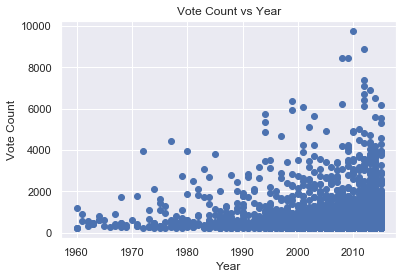

In [15]:
# Distribution of vote count over the years
plt.scatter(df_rating['release_year'], df_rating['vote_count'])
plt.xlabel('Year')
plt.ylabel('Vote Count')
plt.title('Vote Count vs Year')
plt.show()

>__It looks like we have a lot more data points for `vote_count` in year 2000-2015 than previous years. Let's take a look at the number of movies released to find out if there is a correlation__.

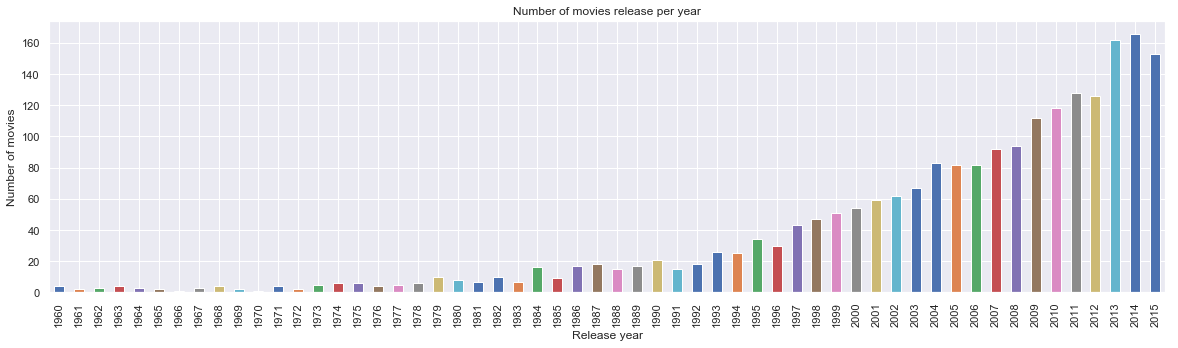

In [16]:
movie_count_s = df_rating.groupby('release_year')['id'].count()
plt.figure(figsize=(20, 5))
ax = movie_count_s.plot(kind='bar', title='Number of movies release per year', )
ax.set_xlabel('Release year')
ax.set_ylabel('Number of movies');

>__It is evident that the number of movies selected for year 2000-2015 are alot more than the years before 2000. That is the reason why we have more data points for year 2000-2015 compared to years before 2000__.

__Let's create a function to calculate the weighted average__

In [17]:
def wt_rating(d, m=m, C=C):
    '''
    Calculates the weighted rating of a movie based on the
    formula above.
    :param data: dataframe 
    :param m: Minimum number of vote_count required
    :param C: Overall mean of vote_average
    '''
    v = d['vote_count']
    R = d['vote_average']
    return (((R * v) + (C * m)) / (v + m))

__Using `wt_rating` function we can calculate weighted rating for each movie.__

In [18]:
# Add 'weighted_rating' column in the dataframe
df_rating['weighted_rating'] = df_rating.apply(wt_rating, axis=1)

# Look at top 5 rows. Only show columns that relevant to weighted_rating
df_rating[['original_title', 'vote_average', 'weighted_rating', 'vote_count']].head()

,original_title,vote_average,weighted_rating,vote_count
0,Jurassic World,6.5,6.480624,5562
1,Mad Max: Fury Road,7.1,7.063082,6185
2,Insurgent,6.3,6.273807,2480
3,Star Wars: The Force Awakens,7.5,7.442029,5292
4,Furious 7,7.3,7.212055,2947


>__Let's try to visualize the variation between `vote_average` and `weighted_rating`. The green line shows the overall mean of vote_average('C') calculated previously. Since there are too many rows, we will pick 10 random movies from the data.__

,original_title,vote_average,weighted_rating,vote_count
9720,Planet of the Apes,7.2,6.820296,469
8987,American History X,8.0,7.761424,1563
10399,The Graduate,7.5,6.996398,426
124,Paranormal Activity: The Ghost Dimension,5.0,5.419241,267
4429,The Lucky One,6.8,6.575928,569
9924,Willy Wonka & the Chocolate Factory,7.2,6.799563,434
1976,Leap Year,6.3,6.156367,283
5644,Out of the Furnace,6.4,6.265266,469
10144,The Apartment,7.9,6.991448,235
6606,Penelope,6.4,6.186698,220


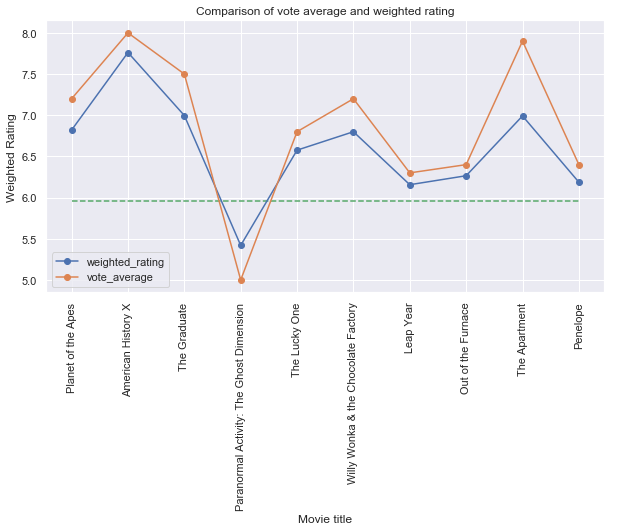

In [19]:
# Pick 10 random movies from data
df_rating_sample = df_rating.sample(10)

# Plot vote_average and weighted_rating for sampled movies.
plt.figure(figsize=(10, 5))
plt.plot(df_rating_sample['original_title'], df_rating_sample['weighted_rating'], marker='o')
plt.plot(df_rating_sample['original_title'], df_rating_sample['vote_average'], marker='o')
plt.legend()
plt.xlabel('Movie title')
plt.xticks(rotation=90)
plt.ylabel('Weighted Rating')
plt.title('Comparison of vote average and weighted rating')
plt.hlines(y=C, 
           xmin=df_rating_sample.iloc[0]['original_title'], 
           xmax=df_rating_sample.iloc[-1]['original_title'], 
           linestyles='dashed', colors='g', label='C');

# Show the information about sampled movies in tabular format.
df_rating_sample[['original_title', 'vote_average', 'weighted_rating', 'vote_count']]

>__From the graph above, we can see that the rating for the movies with lesser number votes is pulled closer the to overall mean represented by green line in the graph. However, rating for movies with large number of votes is approximately the same i.e. closer to pure arithmetic average.__

__Now let's try to find answer to questions we brainstormed earlier.__

<a id='eda'></a>
## Exploratory Data Analysis

## Q1. What is the trend in movie rating through the years?

###  Overall distribution of rating

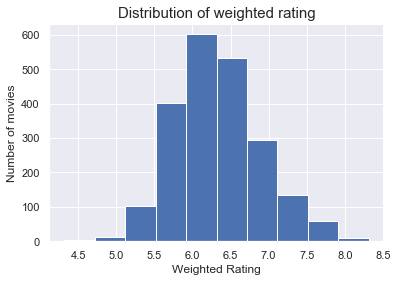

In [20]:
ax = df_rating['weighted_rating'].hist();
ax.set_ylabel('Number of movies')
ax.set_xlabel('Weighted Rating')
ax.set_title('Distribution of weighted rating', fontdict={'fontsize':15});

>__Weighted rating for the movies almost seems to be normally distributed.__

### Highest rated movie each year

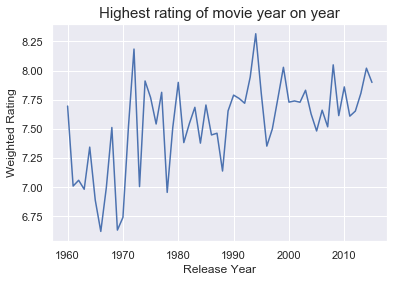

In [21]:
# Highest rated movies year on year
ax = df_rating.groupby('release_year')['weighted_rating'].max().plot()
ax.set_xlabel('Release Year')
ax.set_ylabel('Weighted Rating')
ax.set_title('Highest rating of movie year on year', fontdict={'fontsize':15});

>__The graph above shows the highest rating achieved for all the movies released in a year. The overall trend seems to be growing upward.__ 

__It looks like highest ever rated movie was released around year 1995. Let's dig in to find out more details about this movie.__

In [22]:
temp = df_rating.groupby('release_year')['weighted_rating'].max()

# Find the overall highest rated movie 
df_rating[df_rating['weighted_rating'] == temp.max()]

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,weighted_rating
4178,278,7.192039,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142,Drama|Crime,9/10/94,5754,8.4,1994,36777789,41693462,8.315269


>__The highest rated movie is `The Shawshank Redemption` released in 1994 with rating 8.31.__

### Lowest rated movie each year

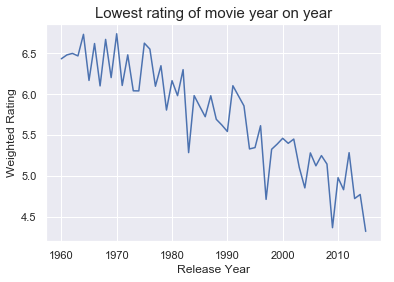

In [23]:
# Lowest rated movie year on year
ax = df_rating.groupby('release_year')['weighted_rating'].min().plot()
ax.set_xlabel('Release Year')
ax.set_ylabel('Weighted Rating')
ax.set_title('Lowest rating of movie year on year', fontdict={'fontsize':15});

>__The graph above shows the lowest rating achieved for all the movies released in a year. The overall trend seems to be growing downward.__ 

__It looks like lowest ever rated movie was released around year 2015. Let's dig in to find out more details about this movie.__

In [24]:
temp = df_rating.groupby('release_year')['weighted_rating'].min()

# Find the overall lowest rated movie 
df_rating[df_rating['weighted_rating'] == temp.min()]

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,weighted_rating
102,241251,1.651078,The Boy Next Door,Jennifer Lopez|Ryan Guzman|Ian Nelson|John Cor...,Rob Cohen,91,Thriller,1/23/15,810,3.9,2015,3679998,46150034,4.319292


>__The lowest ever rated movie is `The Boy Next Door` released in 2015 with a rating of 4.32.__

### Average movie rating each year

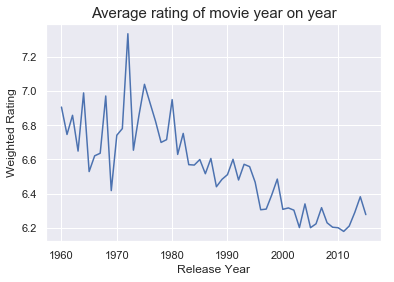

In [25]:
# Average rating year on year
ax = df_rating.groupby('release_year')['weighted_rating'].mean().plot()
ax.set_xlabel('Release Year')
ax.set_ylabel('Weighted Rating')
ax.set_title('Average rating of movie year on year', fontdict={'fontsize':15});

>__The graph above shows the average rating achieved for all the movies released in a year. The overall trend seems to be growing downward.__ 

__It looks like the year with highest avergae rating for all the movies released is around 1973 . Let's dig in to find out more details about the movies released this year.__

In [26]:
df_rating_avg_grp = df_rating.groupby('release_year')['weighted_rating'].mean()
print(f'Year "{df_rating_avg_grp.idxmax()}" has movies with highest average rating of "{round(df_rating_avg_grp.max().max(), 2)}"')

Year "1972" has movies with highest average rating of "7.33"


In [27]:
# List of all the movies released in year 1972
df_rating[df_rating.release_year == 1972]

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,weighted_rating
7269,238,5.738034,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,175,Drama|Crime,3/15/72,3970,8.3,1972,31287365,1277913732,8.184036
7270,10669,0.949381,Deliverance,Jon Voight|Burt Reynolds|Ned Beatty|Ronny Cox|...,John Boorman,109,Drama|Adventure|Thriller,7/30/72,209,7.0,1972,10429121,240507830,6.482500


>__Oh! So only two movies were released this year and both have high weighted rating. That is why average rating is high too!__

### Top 20 highest rated movies of all time

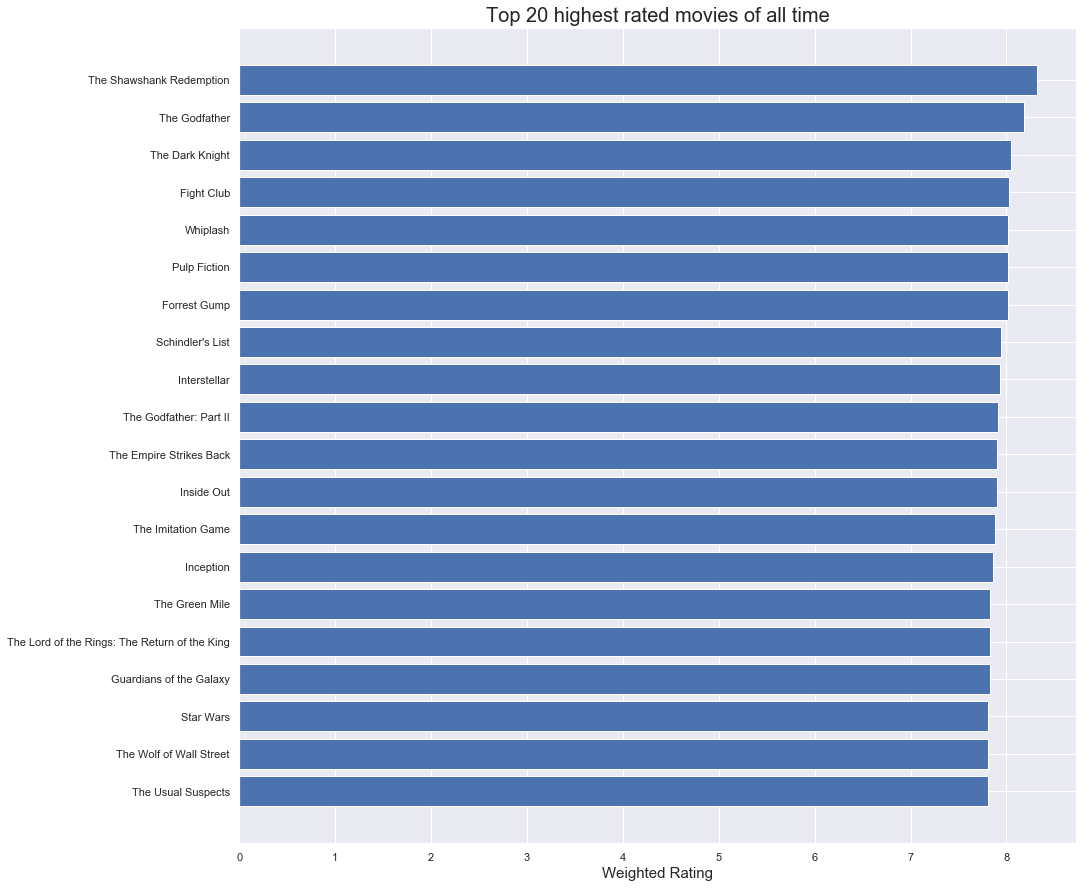

In [28]:
# Top 20 highest rated movies of all time
df_rating_sorted = df_rating.sort_values('weighted_rating', ascending=False)[:20]
plt.figure(figsize=(15, 15))
plt.barh(df_rating_sorted['original_title'], df_rating_sorted['weighted_rating'], align='center')
plt.gca().invert_yaxis()
label_font = {'size': 15}
plt.xlabel('Weighted Rating', **label_font)
plt.title("Top 20 highest rated movies of all time", fontdict={'fontsize':20});

>__Above graph shows top 20 highest rated movies from years 1960-2015. No doubt, `The Shawshank Redemption` tops this list.__

## Q2. Which properties are associated with movie rating?

### Does movies rating have correlation with revenue?

Correlation value between "weighted_rating" and "revenue_adj" is 0.26


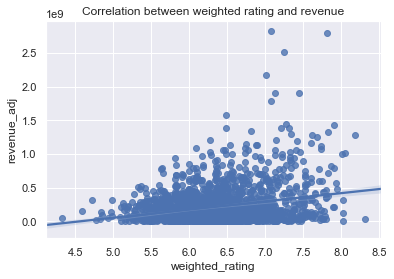

In [29]:
# 1. Exclude rows which have revenue_adj <= 0
df_rating_rev = df_rating[~(df_rating.revenue_adj <= 0)]

# 2. Calculate standard pearson correlation between weighted_rating and revenue_adj
cor_val = df_rating_rev['weighted_rating'].corr(df_rating_rev['revenue_adj'])
print(f'Correlation value between "weighted_rating" and "revenue_adj" is {round(cor_val, 2)}')
sns.regplot(x='weighted_rating', y='revenue_adj', data=df_rating_rev)
plt.title('Correlation between weighted rating and revenue');

>__Weighted rating and revenue seem to be positively correlated with Pearson correleation value of `0.26`. The plot above visualizes this correlation.__ 

### Does movies rating have correlation with runtime?

Correlation value between "weighted_rating" and "runtime" is 0.29


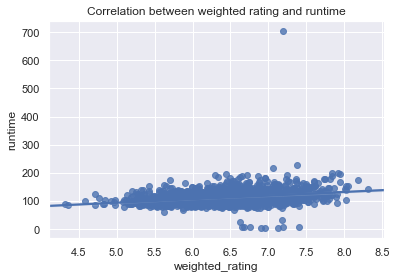

In [30]:
# 1. Exclude rows which have runtime <= 0
df_rating_run = df_rating[~(df_rating.runtime <= 0)]

# 2. Calculate standard pearson correlation between weighted_rating and runtime
cor_val = df_rating_run['weighted_rating'].corr(df_rating_run['runtime'])
print(f'Correlation value between "weighted_rating" and "runtime" is {round(cor_val, 2)}')

# 3. Plot the correlation graph
sns.regplot(x='weighted_rating', y='runtime', data=df_rating_run)
plt.title('Correlation between weighted rating and runtime');

>__Weighted rating and runtime seem to be positively correlated with Pearson correleation value of `0.29`. The plot above visualizes this correlation.__ 

### Does movies rating have correlation with popularity?

Correlation value between "weighted_rating" and "popularity" is 0.37


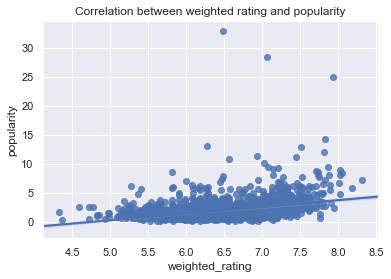

In [31]:
# 1. Exclude rows which have popularity <= 0
df_rating_pop = df_rating[~(df_rating.popularity <= 0)]

# 2. Calculate standard pearson correlation between weighted_rating and popularity
cor_val = df_rating_pop['weighted_rating'].corr(df_rating_pop['popularity'])
print(f'Correlation value between "weighted_rating" and "popularity" is {round(cor_val, 2)}')

sns.regplot(x='weighted_rating', y='popularity', data=df_rating_pop);
plt.title('Correlation between weighted rating and popularity');

>__Weighted rating and popularity seem to be positively correlated with Pearson correleation value of 0.37. The plot above visualizes this correlation.__ 

### Does movies rating have correlation with release year?

Correlation value between "weighted_rating" and "release_year" is -0.21


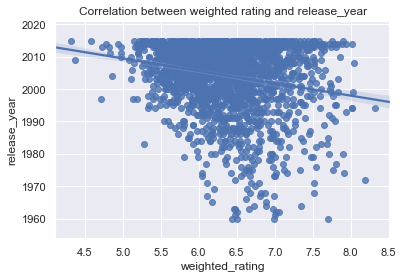

In [32]:
# 1. create a copy original data
df_rating_rely = df_rating.copy()

# 2. Calculate standard pearson correlation between weighted_rating and release_year
cor_val = df_rating_rely['weighted_rating'].corr(df_rating_rely['release_year'])
print(f'Correlation value between "weighted_rating" and "release_year" is {round(cor_val, 2)}')

sns.regplot(x='weighted_rating', y='release_year', data=df_rating_rely)
plt.title('Correlation between weighted rating and release_year');

>__Weighted rating and release year seem to be negative correlated with Pearson correleation value of -0.21. The plot above visualizes this correlation.__ 

<a id='limitations'></a>
## Limitations

The analysis provided above may not be fully accurate. Few of the reasons are listed below:
>- The data available for initial years like 1960-1985 is a lot less compared to the data avialable for recent years 2000-2015. This makes the analysis very skewed as the data from recent years contribute a lot more to the results.
>- About 75% of movie data is excluded from calculation of `weighted_rating` and further analysis because they have very low `vote_count`.
>- The formula used for calculating `weighted_rating` will also get affected because it relies on overall `vote_average` and since we have alot more movies in years 2000-2015, they contribute more to the overall average.
>- `revenue_adj` and `runtime` columns have many entries with inavalid values(<= 0) which had to be excluded from the analysis.
>- It is possible that the data provided is not up-to-date.

<a id='conclusions'></a>
## Conclusions

>- `weighted rating` seems to be normally distributed overall.
>- Highest rating achieved by a movie year after year seems to have an upward trend. This does not neccessarily mean that we are making better movies as years pass. This result may be skewed because the number of movies released and vote count are also increasing year after year.
>- Similarily, Lowest rating achieved by a movie year after year seems to have a downward trend. This does not necessarily mean that we are hitting a new low as years pass. This result too, may be skewed because the number of movies released and vote count are also increasing year after year.
>- `The Shashawnk Redemption` is the highest rated movie between 1960-2015 based on data provided.
>- `The Boy Next Door` is the lowest rated movie between 1960-2015 based on data provided.
>- There does not seem to be a strong corrleation between `weighted rating` and other properties like `revenue`, `runtime`, `release year` as all the correlation values are closer to 0. 
>- It is surprising to know that `popularity` of a movie only has a correlation value of __0.37__ with `weighted_rating`. I expected it to more closer to 1. Further exploration is required to find the reason.


This data can be further explored by examining the correlation of `weighted_rating` with `genre`, `cast` and `director`.

<a id='references'></a>
## References
>- https://en.wikipedia.org/wiki/Bayes_estimator
>-  https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system?